In [1]:
import database as db
import pandas as pd
import numpy as np
import data_visuals as dv
import matplotlib.pyplot as plt
import rating_predictor as rp


# Data Histogram

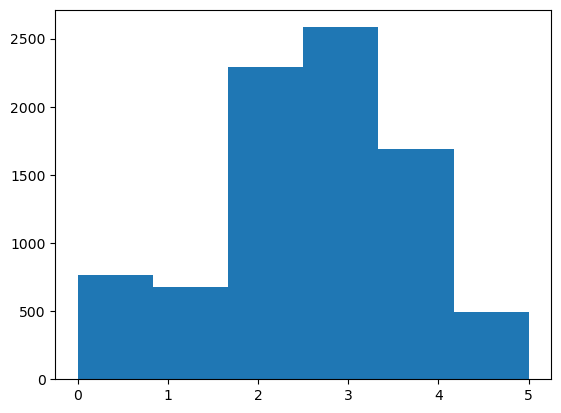

In [3]:
apba = db.load_all_apba()
# apba.head()
dv.data_histogram(apba, 'RatePhysical', 6)

# Stats to use.
1. Hits/Game
2. Hits/60 mins
3. Puck Possession
4. Height
5. Weight
6. Age

In [42]:
real_data = pd.read_csv('HockeyRef_Data_Files/Hockey-Ref_Player_Data_2022-23.csv')
real_data.head()

,UID,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,TotPPGF,TotGA,TotPPGA,PlusMin,XGF,XGA,XPlusMin,OPS,DPS,TotPS
0,abruzni01,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,1,0,0,1,0.5,0.7,-0.1,0.1,0.1,0.2
1,acciano01,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,0,57,19,-4,37.3,38.9,-1.6,0.5,1.1,1.5
2,addisca01,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,38,48,0,-17,30.9,30.8,0.1,1.9,1.3,3.2
3,afanaeg01,Egor Afanasyev,22.0,NSH,LW,17,1,0,1,-7,...,0,10,0,-7,5.1,7.6,-2.5,-0.3,0.0,-0.3
4,agozzan01,Andrew Agozzino,32.0,SJS,LW,4,1,2,3,-1,...,0,4,0,-1,3.7,2.3,1.4,0.2,0.0,0.2


In [43]:
small = real_data.filter(items=['Player', 'GP', 'HIT', 'PIM', 'ATOI', 'TakeAways', 'GiveAways', 'Pos'])

In [44]:
small

,Player,GP,HIT,PIM,ATOI,TakeAways,GiveAways,Pos
0,Nicholas Abruzzese,2,1,0,8:59,0,0,C
1,Noel Acciari,77,244,21,14:19,33,13,C
2,Calen Addison,62,19,22,16:07,11,21,D
3,Egor Afanasyev,17,23,2,10:51,1,2,LW
4,Andrew Agozzino,4,12,0,16:22,0,1,LW
...,...,...,...,...,...,...,...,...
946,Mika Zibanejad,82,71,20,19:58,57,67,C
947,Radim Zohorna,10,7,0,8:35,5,0,F
948,Artem Zub,53,131,39,20:15,8,31,D
949,Mats Zuccarello,78,51,26,20:12,45,44,LW


In [45]:
ex = small['ATOI'][0]

print(ex)

def convert_time(atoi: str) -> int:
    """ Converts a string represnetation of time on ice to
    a float representation of time on ice in minutes.

    params:
        atoi: string representation of time on ice in the format
        'MM:SS'
    returns:
        int representation of time on ice in seconds.
    """

    times = atoi.split(':')
    return int(times[0]) * 60 + int(times[1])

convert_time(ex)




8:59


539

In [46]:
small['ATOI'] = small.apply(lambda x: convert_time(x['ATOI']), axis=1)

In [47]:
small = small[small['GP'] > 15]

In [65]:
colors = {'C': 'red', 'LW': 'green', 'RW': 'green', 'F': 'yellow', 'D': 'blue', 'W': 'green'}

In [69]:
hits_60 = small['HIT'] / small['ATOI'] / small['GP'] * 3600 # hits per
pims_60 = small['PIM'] / small['ATOI'] / small['GP'] * 3600 # pims per
take_60 = small['TakeAways'] / small['ATOI'] / small['GP'] * 3600 # takeaways per
give_60 = small['GiveAways'] / small['ATOI'] / small['GP'] * 3600 # giveaways per
color = list(map(lambda x: colors[x], small['Pos']))

In [74]:
small['hits_60'] = hits_60.values
small['pims_60'] = pims_60.values
small['take_60'] = take_60.values
small['give_60'] = give_60.values

small



/var/folders/vj/vb8pc7w56j1f0g_fxnwt5pzh0000gn/T/ipykernel_71323/1213955032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['hits_60'] = hits_60.values
/var/folders/vj/vb8pc7w56j1f0g_fxnwt5pzh0000gn/T/ipykernel_71323/1213955032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['pims_60'] = pims_60.values
/var/folders/vj/vb8pc7w56j1f0g_fxnwt5pzh0000gn/T/ipykernel_71323/1213955032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Player,GP,HIT,PIM,ATOI,TakeAways,GiveAways,Pos,hits_60,pims_60,take_60,give_60
1,Noel Acciari,77,244,21,859,33,13,C,13.280317,1.142978,1.796108,0.707558
2,Calen Addison,62,19,22,967,11,21,D,1.140875,1.321013,0.660506,1.260967
3,Egor Afanasyev,17,23,2,651,1,2,LW,7.481702,0.650583,0.325291,0.650583
5,Sebastian Aho,75,59,42,1170,63,63,F,2.420513,1.723077,2.584615,2.584615
6,Sebastian Aho,71,38,22,1006,14,38,D,1.915269,1.108840,0.705625,1.915269
...,...,...,...,...,...,...,...,...,...,...,...,...
945,Fabian Zetterlund,67,53,14,795,21,23,W,3.582090,0.946212,1.419319,1.554492
946,Mika Zibanejad,82,71,20,1198,57,67,C,2.601897,0.732929,2.088847,2.455312
948,Artem Zub,53,131,39,1215,8,31,D,7.323550,2.180294,0.447240,1.733054
949,Mats Zuccarello,78,51,26,1212,45,44,LW,1.942117,0.990099,1.713633,1.675552


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


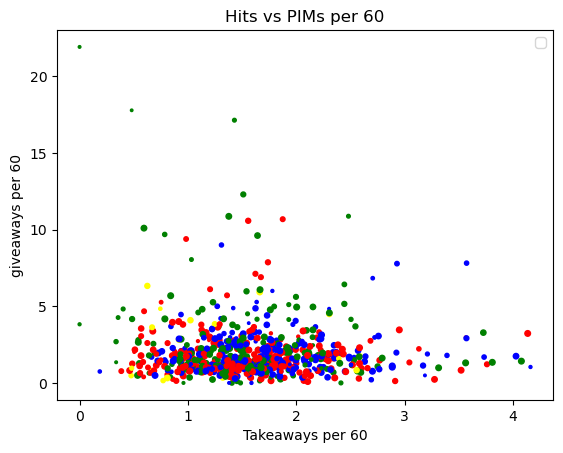

In [72]:
names = small['Player']
plt.scatter(give_60, pims_60, c=color, s=small['GP'] / 5)


plt.ylabel('giveaways per 60')
plt.xlabel('Takeaways per 60')
plt.legend()
plt.title('Hits vs PIMs per 60')
plt.show()
